<a href="https://colab.research.google.com/github/Owaisa26/Owaisa26/blob/main/owaisa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the uploaded file into a Pandas DataFrame
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
data = pd.read_csv(file_name)

# Step 3: Display the first few rows
print(data.head())


Saving countdata_grd.csv to countdata_grd (1).csv
    Unnamed: 0 GSM7071015 GSM7071016 GSM7071017 GSM7071020 GSM7071021  \
0          NaN         BE         BE         BE         BE         BE   
1      DDX11L1          2          1          2          2          3   
2       WASH7P        316        235        242        291        387   
3    MIR6859-1         19         13         12         11         12   
4  MIR1302-2HG          1          0          0          1          0   

  GSM7071037 GSM7071038 GSM7071039 GSM7071011  ... GSM7071036 GSM7071003  \
0         BE         BE         BE         BE  ...       NERD       NERD   
1          2          5          2          0  ...          1          2   
2        235        220        213        199  ...        233        186   
3          9          5          9          6  ...          8          8   
4          0          0          0          0  ...          0          0   

  GSM7071034 GSM7071040 GSM7071041 GSM7071042 GSM70710

<ipython-input-11-a2efe33f8e1a>:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name)


In [ ]:
import pandas as pd

# Assuming 'data' is already loaded
# Step 1: Transpose the dataset
data_transposed = data.T

# Step 2: Set the first row as column names
data_transposed.columns = data_transposed.iloc[0]

# Step 3: Remove the first row
data_transposed = data_transposed[1:]

# Step 4: Display the result
print(data_transposed.head())


Unnamed: 0 NaN DDX11L1 WASH7P MIR6859-1 MIR1302-2HG MIR1302-2 FAM138A OR4F5  \
GSM7071015  BE       2    316        19           1         0       0     0   
GSM7071016  BE       1    235        13           0         0       0     0   
GSM7071017  BE       2    242        12           0         0       0     0   
GSM7071020  BE       2    291        11           1         0       0     0   
GSM7071021  BE       3    387        12           0         0       0     0   

Unnamed: 0 LOC100996442 LOC729737  ... GOLGA2P6 MIR7162 MAP3K8 LOC105376478  \
GSM7071015           82       934  ...        2       0    419            0   
GSM7071016           67       439  ...        3       1    315            1   
GSM7071017           29       233  ...        0       0    138            0   
GSM7071020           58       199  ...        7       0    262            0   
GSM7071021           47       136  ...        1       0    182            0   

Unnamed: 0 LOC105376479 SVIL2P ZNF438 LOC105376481

In [ ]:
# Step 1: Rename the first column to 'target'
data_transposed.rename(columns={data_transposed.columns[0]: 'target'}, inplace=True)

# Step 2: Display the updated DataFrame
print(data_transposed.head())


Unnamed: 0 target DDX11L1 WASH7P MIR6859-1 MIR1302-2HG MIR1302-2 FAM138A  \
GSM7071015     BE       2    316        19           1         0       0   
GSM7071016     BE       1    235        13           0         0       0   
GSM7071017     BE       2    242        12           0         0       0   
GSM7071020     BE       2    291        11           1         0       0   
GSM7071021     BE       3    387        12           0         0       0   

Unnamed: 0 OR4F5 LOC100996442 LOC729737  ... GOLGA2P6 MIR7162 MAP3K8  \
GSM7071015     0           82       934  ...        2       0    419   
GSM7071016     0           67       439  ...        3       1    315   
GSM7071017     0           29       233  ...        0       0    138   
GSM7071020     0           58       199  ...        7       0    262   
GSM7071021     0           47       136  ...        1       0    182   

Unnamed: 0 LOC105376478 LOC105376479 SVIL2P ZNF438 LOC105376481 LOC105376482  \
GSM7071015            0       

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy as np


In [ ]:
label_encoder = LabelEncoder()
for column in data_transposed.select_dtypes(include=['object']).columns:
    data_transposed[column] = label_encoder.fit_transform(data_transposed[column])

In [ ]:
X = data_transposed.iloc[:, :-1]
y = data_transposed.iloc[:, -1]

In [ ]:
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"accuracy: {accuracy:.2f}")

accuracy: 0.50


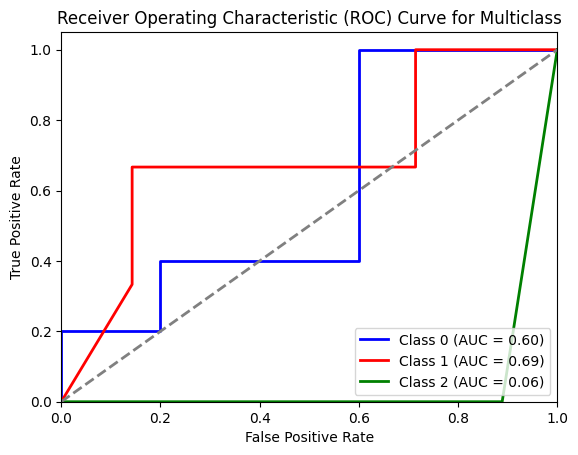

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_prob = model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
colors = ['blue', 'red', 'green']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.savefig('multiclass_roc_curve.png')
plt.show()


In [ ]:
importances = model.feature_importances_
indices = importances.argsort()[::-1]
print("Top 10 Important Features:")
for i in range(10):
    feature_name = X.columns[indices[i]]
    feature_importance = importances[indices[i]]
    print(f"{i + 1}. {feature_name}: {feature_importance:.4f}")
top_features = pd.DataFrame({
    'Feature': X.columns[indices[:10]],
    'Importance': importances[indices[:10]]
})
top_features.to_csv('top_features.csv', index=False)


Top 10 Important Features:
1. LINC01036: 0.0079
2. LOC105376384: 0.0056
3. TRAM1L1: 0.0054
4. IL1A: 0.0053
5. KIAA0319L: 0.0048
6. GJA4: 0.0048
7. YTHDF2: 0.0048
8. ST7-AS1: 0.0048
9. PEX2: 0.0045
10. SPC25: 0.0042
